# Import Semua Packages/Library yang digunakan

In [204]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

Membaca dataset, melakukan pemisahan antar kolom dala file csv dan format tampilan angka decimal di pandas agar menampilkan dua angka dibelakang koma

In [174]:
df = pd.read_csv('TugasDataSainsW3.csv',delimiter=';')
pd.set_option('display.float_format', '{:.2f}'.format)

Menampilkan isi dataset yang berisi 10 variabel (costumer_name, product, price, discount, quantity, total_price, transaction_date, birth_date, location, payment_method)

In [175]:
df.head()

,Customer_Name,Product,Price,Discount,Quantity,Total_Price,Transaction_Date,Birth_Date,Location,Payment_Method
0,CHARLES EDWARDS,Tablet,8717207,5.00,2,16.562.693.299.999.900,01/12/2025,18/06/2001,Jakarta,Cash on Delivery
1,tiffany williams,Smartwatch,1566449,0.00,1,1566449.0,31/12/2024,18/07/2002,Surabaya,Cash on Delivery
2,Edward Shepherd,Camera,18785201,15.00,2,31934841.7,23/11/2024,12/11/2001,NaN,PayPal
3,WAYNE SIMS,Smartphone,14680586,10.00,3,39637582.2,02/10/2024,29/01/2003,Surabaya,PayPal
4,julie wolf,Smartwatch,3745263,10.00,3,10112210.1,04-19-2024,NaN,Bandung,Credit Card


Menampilkan data type dari setiap variabel yang ada di dataset. Terlihat ada beberapa variabel yang data typenya tidak sesuai

### Assesing Data

In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Customer_Name     200 non-null    object 
 1   Product           200 non-null    object 
 2   Price             200 non-null    int64  
 3   Discount          180 non-null    float64
 4   Quantity          200 non-null    int64  
 5   Total_Price       196 non-null    object 
 6   Transaction_Date  200 non-null    object 
 7   Birth_Date        180 non-null    object 
 8   Location          180 non-null    object 
 9   Payment_Method    180 non-null    object 
dtypes: float64(1), int64(2), object(7)
memory usage: 15.8+ KB


Menampilkan missing values yang ada di dalam dataset

In [177]:
df.isna().sum()

Customer_Name        0
Product              0
Price                0
Discount            20
Quantity             0
Total_Price          4
Transaction_Date     0
Birth_Date          20
Location            20
Payment_Method      20
dtype: int64

Menampilkan data yang duplikat

In [178]:
print('Duplicated Data : ', df.duplicated().sum())

Duplicated Data :  0


Melakukan perbaikan terkait type data dan penulisan pada costumer_name 

In [ ]:
df['Customer_Name'] = df['Customer_Name'].str.title() #mengubah costumer name menjadi title ex:Max Payne
df['Price'] = df['Price'].astype(float) # mengubah data price ke float
df['Total_Price'] = df['Total_Price'].str.replace(r'\.', '', regex=True) #mengganti semua nilai yang memiliki titik dan diganti menjadi kosong
df['Total_Price'] = pd.to_numeric(df['Total_Price'], errors='coerce') #mengubah data menjadi float

In [ ]:
def convert(x):
    x = pd.to_datetime(x, format='%d/%m/%Y', errors='coerce') #mengubah data ke type datetime dengan format dd/mm/YY menjadi bawaan dari pandas
    x = x.fillna(pd.to_datetime(df['Transaction_Date'], format='%m-%d-%Y', errors='coerce')) #mengubah data ke type datetime dengan format mm-dd-YY menjadi bawaaan dari pandas
    return x

df['Transaction_Date'] = convert(df['Transaction_Date'])
df['Birth_Date'] = convert(df['Birth_Date'])


In [197]:
df.head()

,Customer_Name,Product,Price,Discount,Quantity,Total_Price,Transaction_Date,Birth_Date,Location,Payment_Method
0,Charles Edwards,Tablet,8717207.00,5,2,16562693299999900.00,2025-12-01,2001-06-18,Jakarta,Cash on Delivery
1,Tiffany Williams,Smartwatch,1566449.00,0,1,15664490.00,2024-12-31,2002-07-18,Surabaya,Cash on Delivery
2,Edward Shepherd,Camera,18785201.00,15,2,319348417.00,2024-11-23,2001-11-12,Denpasar,PayPal
3,Wayne Sims,Smartphone,14680586.00,10,3,396375822.00,2024-10-02,2003-01-29,Surabaya,PayPal
4,Julie Wolf,Smartwatch,3745263.00,10,3,101122101.00,2024-04-19,2024-04-19,Bandung,Credit Card


### Cleaning Data

Menampilkan kolom mana yang terdapat perbedaan data yang terlalu jauh

In [182]:
df.describe().T[['min','25%','50%','75%','max','std']]

,min,25%,50%,75%,max,std
Price,513621.00,5130300.25,9185244.00,14604530.75,19763599.00,5453360.31
Discount,0.00,5.00,10.00,15.00,20.00,6.80
Quantity,1.00,2.00,3.00,4.00,5.00,1.40
Total_Price,13867767.00,149646339.00,352562776.00,886643058.75,66776333199999904.00,8930927430592602.00
Transaction_Date,2024-01-03 00:00:00,2024-06-02 00:00:00,2024-09-11 00:00:00,2024-11-29 00:00:00,2025-12-01 00:00:00,NaN
Birth_Date,1964-06-07 00:00:00,1975-09-27 18:00:00,1986-09-01 00:00:00,2000-09-26 12:00:00,2025-02-22 00:00:00,NaN


Cek outlier dari variabel yang memiliki missing values yaitu total price dan discount

In [183]:
data = ['Total_Price', 'Discount']
for i in data:
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3-Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = df[(df[i] < lower) | (df[i] > upper)]
    print(f"Kolom {i}: {len(outliers)} outliers")

Kolom Total_Price: 39 outliers
Kolom Discount: 0 outliers


dikarenakan discount tidak ada outlier maka cek skewness

In [194]:
df['Discount'].skew()

np.float64(-0.07474757728243654)

Filling missing values 
- Pada total price terdapat outlier maka menggunakan mediam
- Pada discount dikarenakan skewness mendekati normal maka menggunakan mean dan ubah ke integer
- Pada transaction date mengisi menggunakan data sebelumnya karena transaksi biasanya mengikuti transaksi sebelumnya
- Pada birth date mengisi menggunakan median karena usia costumer biasanya tersebar dalam pola normal dan median lebih tahan pada outlier
- Pada location mengisi missing values menggunakan nilai yang sering keluar

In [190]:
df['Total_Price'] = df['Total_Price'].fillna(df['Total_Price'].median())
df['Discount'] = df['Discount'].fillna(df['Discount'].mean())
df['Discount'] = df['Discount'].round().astype('int')
df['Transaction_Date'] = df['Transaction_Date'].bfill()
df['Birth_Date'] = df['Birth_Date'].fillna(df['Birth_Date'].median())
df['Location'] = df['Location'].fillna(df['Location'].mode()[0])
df['Payment_Method'] = df['Payment_Method'].fillna(df['Payment_Method'].mode()[0])

Sudah tidak ada missing values pada data

In [191]:
df.isna().sum()

Customer_Name       0
Product             0
Price               0
Discount            0
Quantity            0
Total_Price         0
Transaction_Date    0
Birth_Date          0
Location            0
Payment_Method      0
dtype: int64

In [211]:
df.head()

,Customer_Name,Product,Price,Discount,Quantity,Total_Price,Transaction_Date,Birth_Date,Location,Payment_Method
0,Charles Edwards,Tablet,8717207.00,5,2,16562693299999900.00,2025-12-01,2001-06-18,Jakarta,Cash on Delivery
1,Tiffany Williams,Smartwatch,1566449.00,0,1,15664490.00,2024-12-31,2002-07-18,Surabaya,Cash on Delivery
2,Edward Shepherd,Camera,18785201.00,15,2,319348417.00,2024-11-23,2001-11-12,Denpasar,PayPal
3,Wayne Sims,Smartphone,14680586.00,10,3,396375822.00,2024-10-02,2003-01-29,Surabaya,PayPal
4,Julie Wolf,Smartwatch,3745263.00,10,3,101122101.00,2024-04-19,2024-04-19,Bandung,Credit Card


In [202]:
correlation = df[['Total_Price', 'Discount', 'Price', 'Quantity']].corr()
print(correlation)

             Total_Price  Discount  Price  Quantity
Total_Price         1.00      0.12   0.02     -0.04
Discount            0.12      1.00  -0.06     -0.01
Price               0.02     -0.06   1.00      0.18
Quantity           -0.04     -0.01   0.18      1.00


**Insight :**

- Dari korelasi diatas menunjukkan hubungan antar variabel yang sangat lemah ini menandakan suatu variabel tidak berpengaruh ke variabel yang lain

### Visualisasi

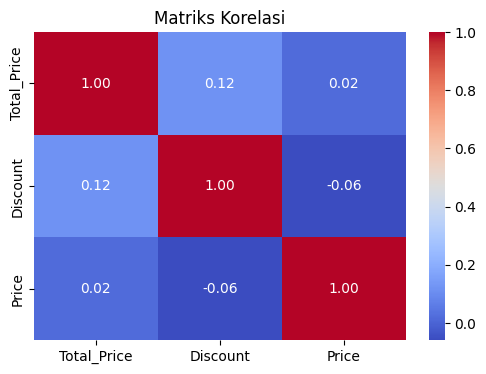

In [ ]:
plt.figure(figsize=(6,4))
sns.heatmap(df[['Total_Price', 'Discount', 'Price']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriks Korelasi")
plt.show()

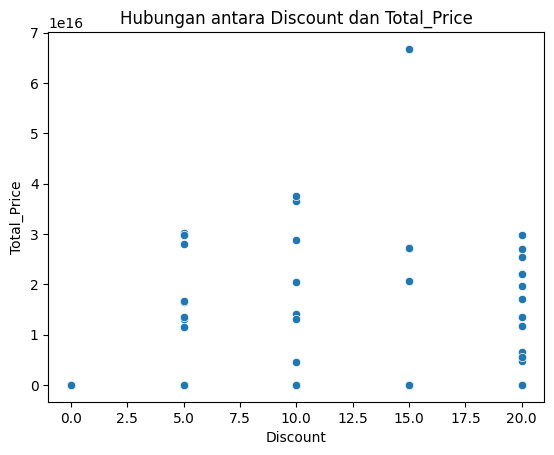

In [210]:
sns.scatterplot(x=df['Discount'], y=df['Total_Price'])
plt.title("Hubungan antara Discount dan Total_Price")
plt.xlabel("Discount")
plt.ylabel("Total_Price")
plt.show()
